In [1]:
import pandas

DATA_PATH_TWEET = r'./annotated data/merged_tweets.csv'

annotated_tweets = pandas.read_csv(DATA_PATH_TWEET, header=None, names = ['tweet', 'label'])

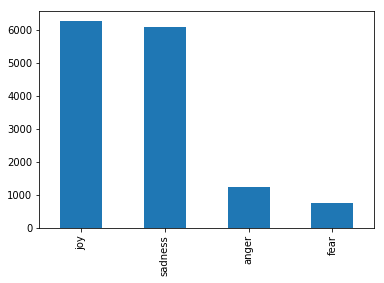

In [2]:
import matplotlib.pyplot as plt

annotated_tweets['label'].value_counts().plot(kind='bar')

plt.show()

plt.gcf().clear()

In [3]:
annotated_tweets['length'] = annotated_tweets['tweet'].apply(len)

In [4]:
print(annotated_tweets.head())

                                               tweet label  length
0  @Its_just_Huong I will beat you !!! Always tho...  fear     124
1  “What worries you masters you.” - Haddon Robin...  fear     109
2  @RogueCoder250 We are in so much trouble!! I d...  fear     113
3  @City_tv  is like the big bully in class ruini...  fear     137
4                  @CharlieEblacker hate being shy 😩  fear      33


In [5]:
import string

translate_table = dict((ord(char), None) for char in string.punctuation)

def remove_punctuation(str):
 return str.translate(translate_table)

annotated_tweets['tweet'] = annotated_tweets['tweet'].apply(remove_punctuation)

In [6]:
from nltk.corpus import stopwords

set_stop_words = set(stopwords.words('english'))

def remove_stop_words(str):
    return ' '.join([word for word in str.split() if word not in set_stop_words]);

annotated_tweets['tweet'] = annotated_tweets['tweet'].apply(remove_stop_words)

print(annotated_tweets['tweet'] .head())

0    ItsjustHuong I beat Always thought id gryffind...
1    “What worries masters you” Haddon Robinson Cho...
2    RogueCoder250 We much trouble I dont think Rev...
3    Citytv like big bully class ruining everyones ...
4                           CharlieEblacker hate shy 😩
Name: tweet, dtype: object


In [7]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = nltk.casual.TweetTokenizer(preserve_case=False, reduce_len=True)

In [19]:
tokenizer.tokenize(annotated_tweets['tweet'].iloc[4])

['charlieeblacker', 'hate', 'shy', '😩']

In [12]:
annotated_tweets['length'] = annotated_tweets['tweet'].apply(len)

In [13]:
print(annotated_tweets.head())

                                               tweet label  length
0  ItsjustHuong I beat Always thought id gryffind...  fear      83
1  “What worries masters you” Haddon Robinson Cho...  fear      97
2  RogueCoder250 We much trouble I dont think Rev...  fear      77
3  Citytv like big bully class ruining everyones ...  fear     106
4                         CharlieEblacker hate shy 😩  fear      26


In [17]:
from collections import Counter

annotated_tweets['words_count'] = annotated_tweets['tweet'].apply(lambda x: len(x.lower().split()))

In [18]:
print(annotated_tweets.head())

                                               tweet label  length  \
0  ItsjustHuong I beat Always thought id gryffind...  fear      83   
1  “What worries masters you” Haddon Robinson Cho...  fear      97   
2  RogueCoder250 We much trouble I dont think Rev...  fear      77   
3  Citytv like big bully class ruining everyones ...  fear     106   
4                         CharlieEblacker hate shy 😩  fear      26   

   words_count  
0           13  
1           11  
2           13  
3           17  
4            4  
